In [25]:
!pip install seaborn

     |████████████████████████████████| 292 kB 854 kB/s            
You should consider upgrading via the '/home/phillip/miniconda3/envs/timeeval/bin/python3.8 -m pip install --upgrade pip' command.


In [26]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.set(rc={"figure.figsize":(20, 10)})

In [3]:
with open("../results.only.patternlength.json", "r") as f:
    scores = json.load(f)

In [4]:
with open("../transitions.only.patternlength.json", "r") as f:
    transi = json.load(f)

<AxesSubplot:ylabel='Count'>

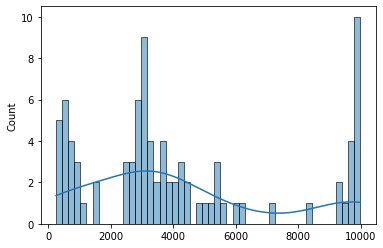

In [36]:
keys = scores["mut:5000/akita/s2gpp"].keys()

x = []
y = []

for k in keys:
    s = scores["mut:5000/akita/s2gpp"][k]["score"]
    if s is not None and float(s) > 0.99:
        x.append(s)
        y.append(int(transi["mut:5000/akita/s2gpp"][k]["transitions"][0]))

sns.histplot(y, bins=50, kde=True)

In [66]:
import pandas as pd
import numpy as np
from pathlib import Path

In [117]:
df = pd.read_csv("../data/hyperopt/datasets.csv")

In [130]:
def first_int_or_none(x: list):
    if len(x) == 0:
        return np.NAN
    return int(x[0])

def first_float_or_none(x: list):
    if len(x) == 0:
        return np.NAN
    return float(x[0])

In [131]:
base_path = Path(list(scores["mut:5000/akita/s2gpp"].keys())[0]).parent.parent
df.loc[:, "score"] = df.dataset_name.apply(lambda d: scores["mut:5000/akita/s2gpp"][str(base_path / d.split(".")[0] / "test.csv")]["score"]).astype(float)
df.loc[:, "pattern-length"] = df.dataset_name.apply(lambda d: first_float_or_none(scores["mut:5000/akita/s2gpp"][str(base_path / d.split(".")[0] / "test.csv")]["location"])).astype(float)
df.loc[:, "transitions"] = df.dataset_name.apply(lambda d: first_int_or_none(transi["mut:5000/akita/s2gpp"][str(base_path / d.split(".")[0] / "test.csv")]["transitions"]))
df.loc[:, "bo"] = df.dataset_name.apply(lambda x: x.split("-")[0])
df.loc[:, "atype"] = df.dataset_name.apply(lambda x: x.split("-")[1])

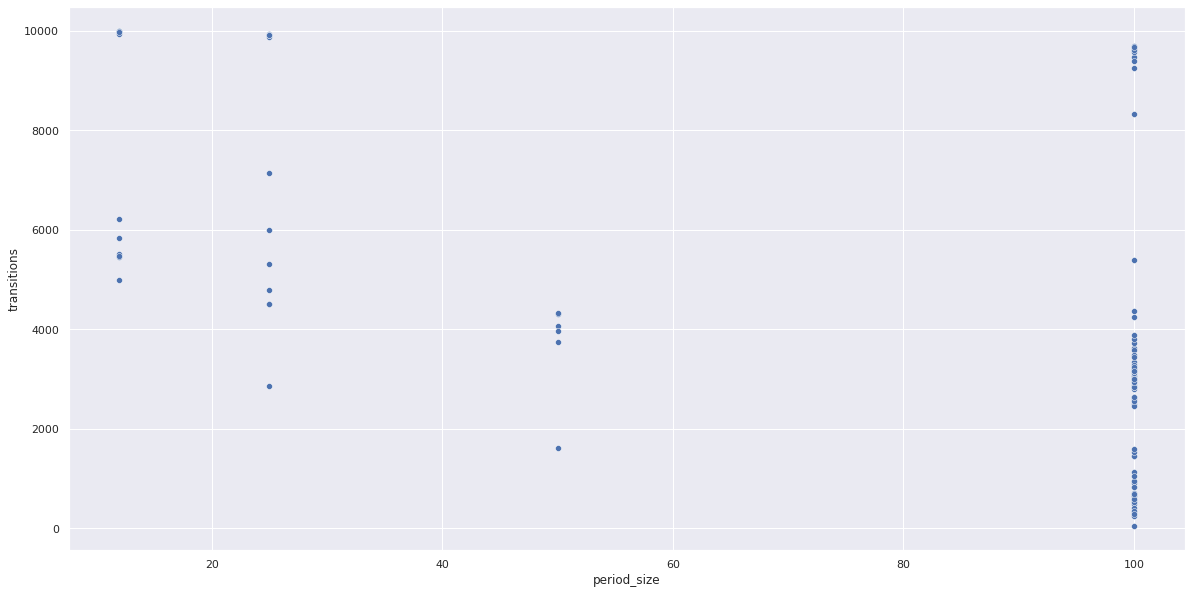

In [143]:
g = sns.scatterplot(y=df.transitions, x=df["period_size"])

<AxesSubplot:>

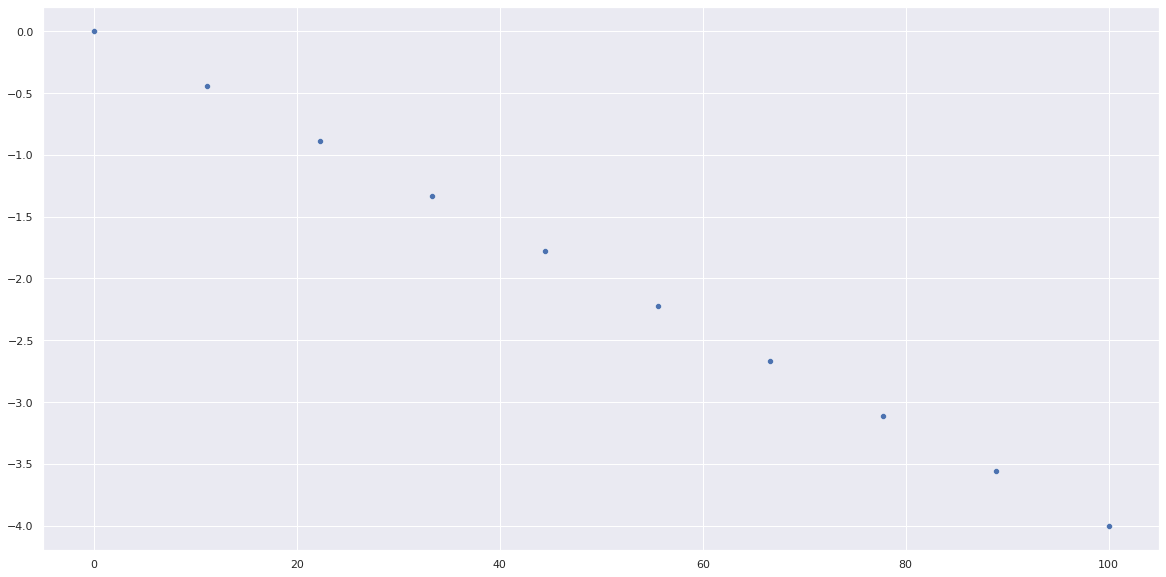

In [145]:
x = np.linspace(0, 100, 10)
sns.scatterplot(x=x, y=x * (-20/500))

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/haystack/haystack-ecg-3-pattern/test.csv")

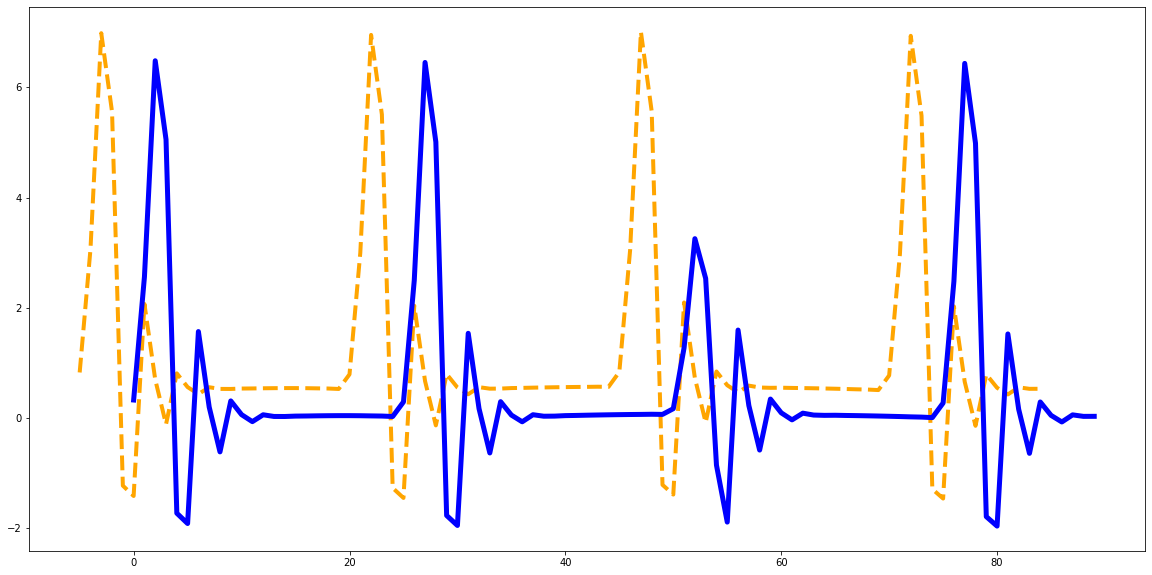

In [32]:
plt.rcParams["figure.figsize"] = (20, 10)

variate_base = df.iloc[:90, [2]]
variate0 = np.concatenate([variate_base[:50], variate_base[50:55] * 0.5, variate_base[55:]])
variate1 = variate_base

plt.plot(np.arange(len(variate1)) - 5, variate1 + 0.5, linewidth=4, linestyle="--", color="orange")
plt.plot(variate0, linewidth=5, color="blue")

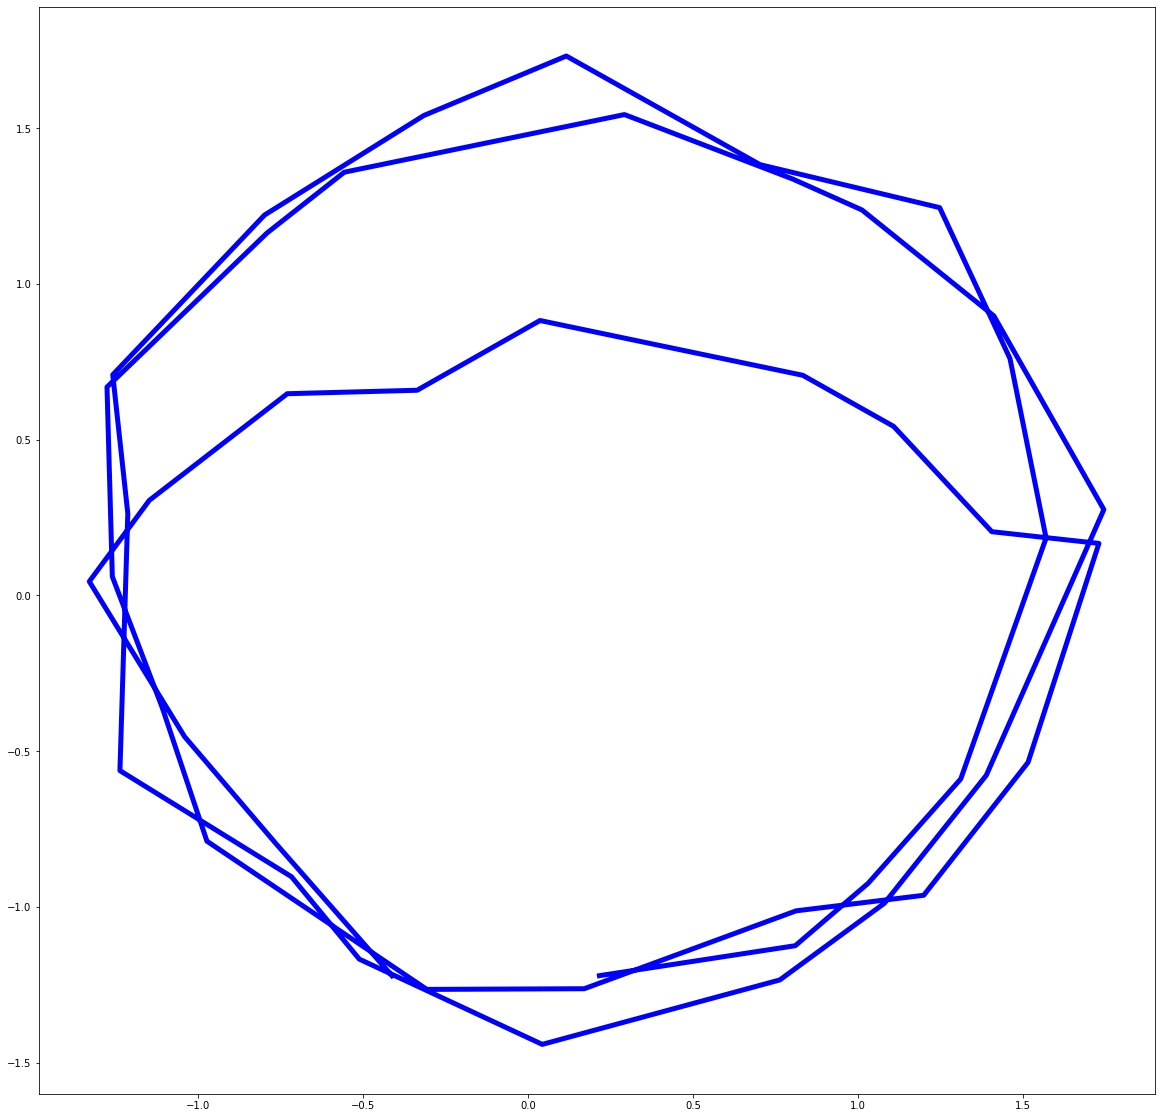

In [59]:
spiral_x = np.array([0, 0.6, 1, 1.3, 1.5, 1.3, 1, 0.6, 0, -0.6, -1, -1.3, -1.5, -1.3, -1, -0.6])
spiral_y = np.concatenate([spiral_x[-4:], spiral_x[:-4]])

anomaly_spiral_x = np.array([0, 0.6, 1, 1.3, 1.5, 1.3, 1, 0.6, 0, -0.6, -1, -1.3, -1.5, -1.3, -1, -0.6])
anomaly_spiral_y = np.array([-1.5, -1.3, -1, -0.6, 0, 0.2, 0.4, 0.6, 0.7, 0.6, 0.4, 0.2, 0, -0.6, -1, -1.3])

rounds = 2
x = np.concatenate([spiral_x]*rounds + [anomaly_spiral_x]) + np.random.rand(len(spiral_x) * (rounds + 1)) * 0.3
y = np.concatenate([spiral_y]*rounds + [anomaly_spiral_y]) + np.random.rand(len(spiral_x) * (rounds + 1)) * 0.3

plt.rcParams["figure.figsize"] = (20, 20)
plt.plot(x, y, linewidth=5, color="blue")#, color="orange", linestyle="--")
variate_0 = (x, y)

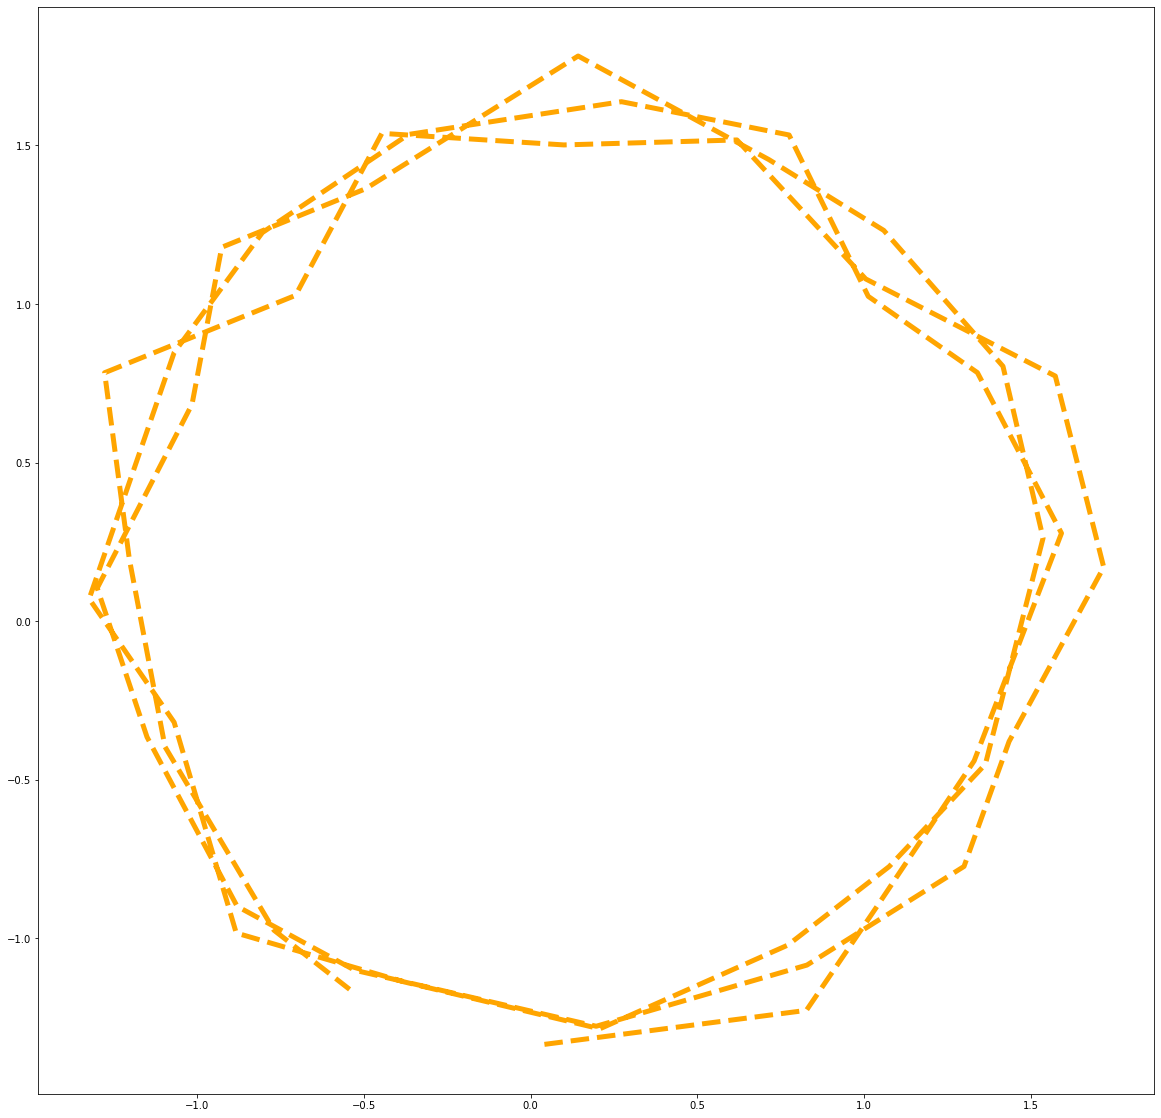

In [60]:
spiral_x = np.array([0, 0.6, 1, 1.3, 1.5, 1.3, 1, 0.6, 0, -0.6, -1, -1.3, -1.5, -1.3, -1, -0.6])
spiral_y = np.concatenate([spiral_x[-4:], spiral_x[:-4]])

rounds = 3
x = np.concatenate([spiral_x]*rounds) + np.random.rand(len(spiral_x) * rounds) * 0.3
y = np.concatenate([spiral_y]*rounds) + np.random.rand(len(spiral_x) * rounds) * 0.3

plt.rcParams["figure.figsize"] = (20, 20)
plt.plot(x, y, linewidth=5, color="orange", linestyle="--")
variate_1 = (x, y)

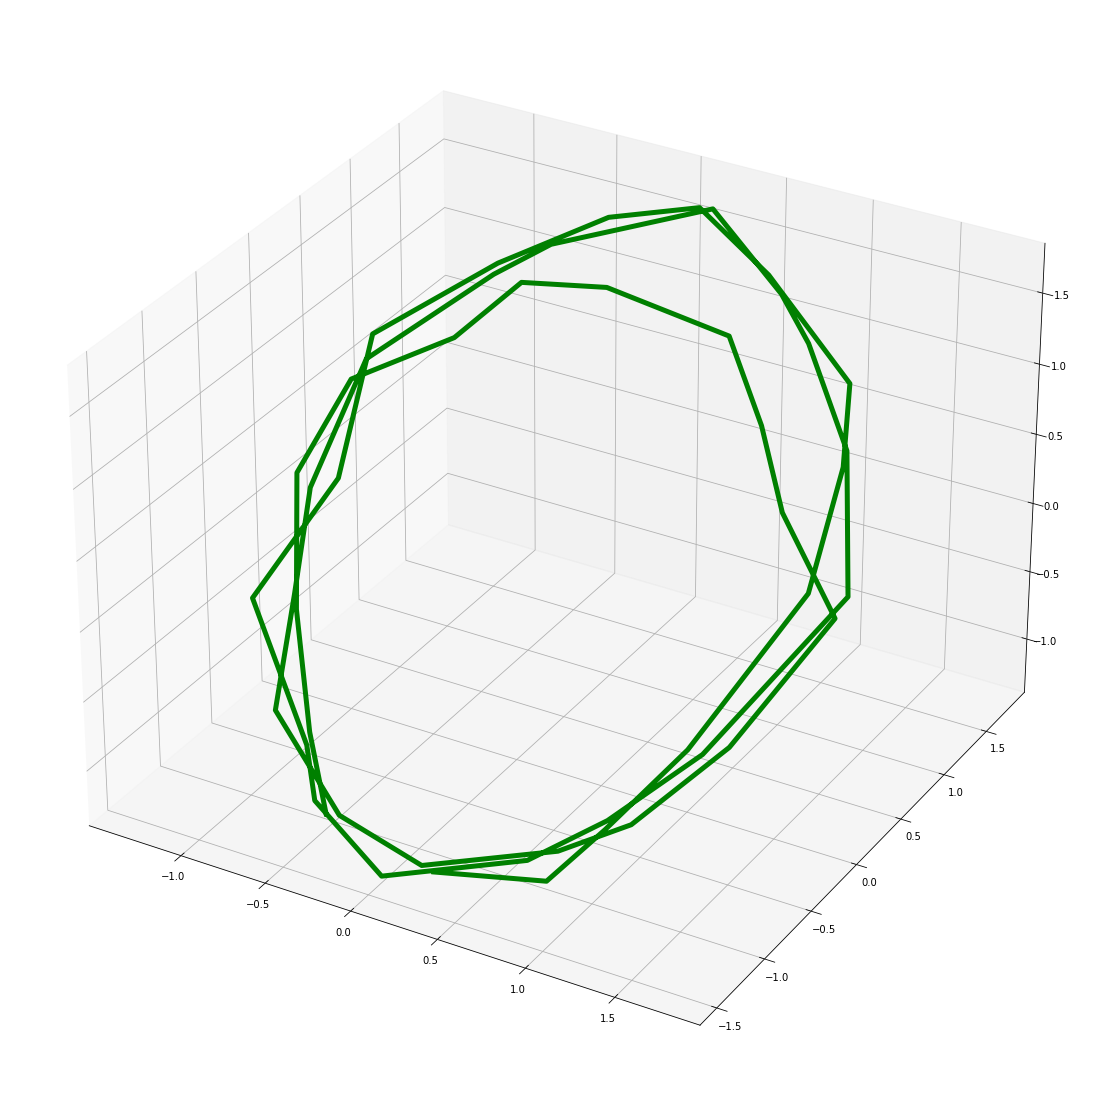

In [66]:
ax = plt.axes(projection="3d")
 
# creating a wide range of points x,y,z
x=variate_0[0]
y=variate_0[1]
z=variate_1[1]
 
# plotting a 3D line graph with X-coordinate,
# Y-coordinate and Z-coordinate respectively
ax.plot3D(x, y, z, 'green', linewidth=5)
 
# plotting a scatter plot with X-coordinate,
# Y-coordinate and Z-coordinate respectively
# and defining the points color as cividis
# and defining c as z which basically is a
# defination of 2D array in which rows are RGB
#or RGBA
 
# Showing the above plot
plt.show()